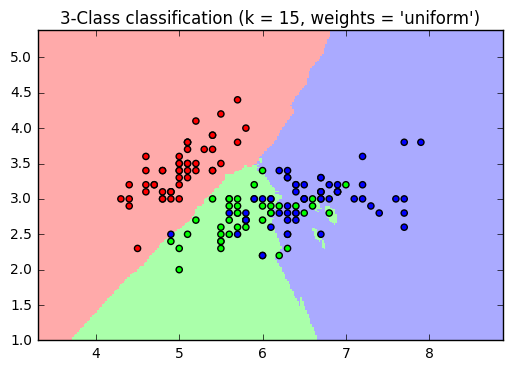

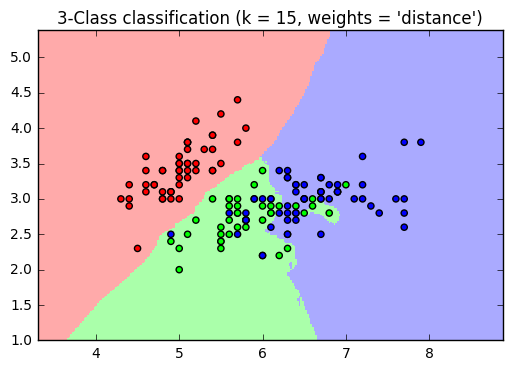

In [6]:
# 监督学习

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [7]:
# 1.6.3 Nearest Neighbors Regression

# generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)

X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0,5,500)[:,np.newaxis]
y = np.sin(X).ravel()

y[::5] += 1 * (0.5-np.random.rand(8))  # 选取下标为 0 ，5，10，...的元素，随机加入噪声


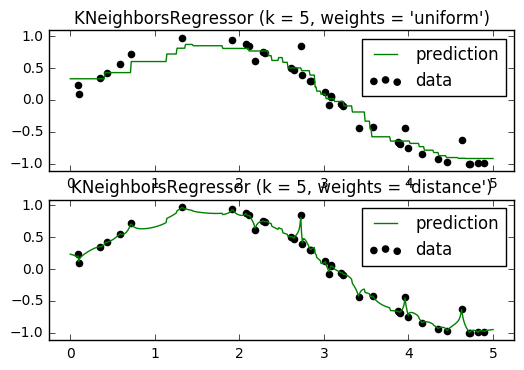

In [8]:
n_neighbors = 5
for i, weights in enumerate(['uniform','distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors,weights=weights)
    y_ = knn.fit(X,y).predict(T)
    
    plt.subplot(2,1,i+1)
    plt.scatter(X,y,c='k',label='data')
    plt.plot(T,y_,c='g',label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))
plt.show()
    

In [9]:
# face completion with a multi-output estimators
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


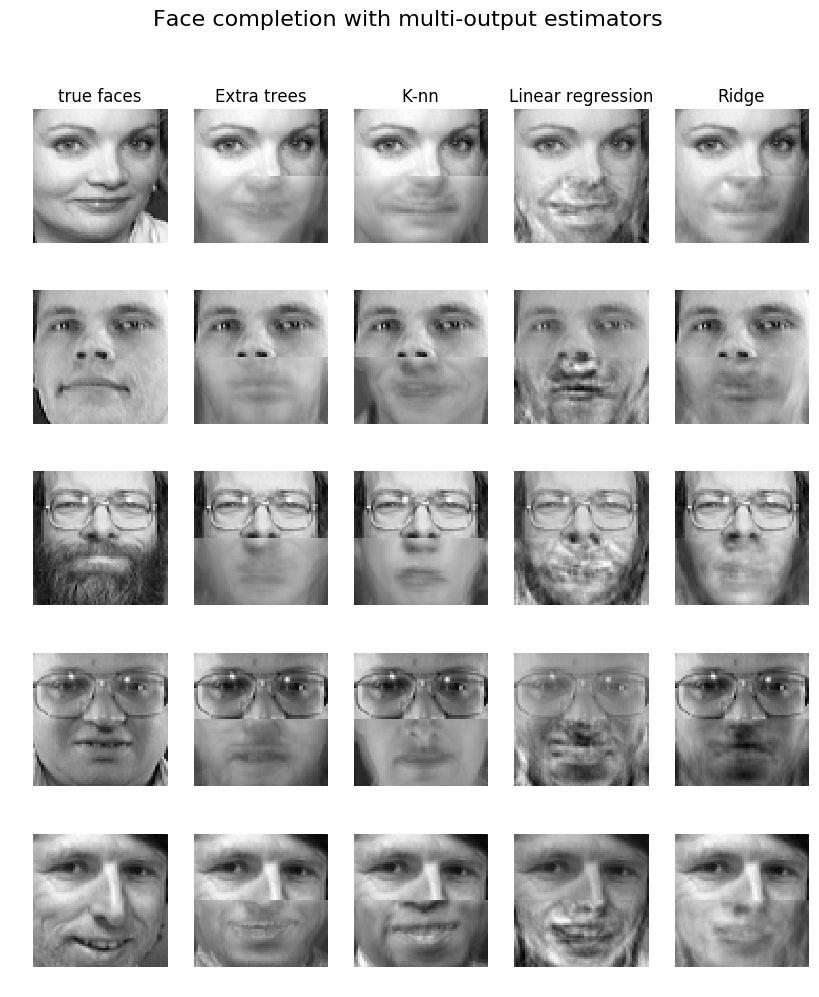

In [12]:
# load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

# data.images [400,64,64] reshape data [400,4096]
data = data.images.reshape(len(data.images),-1)


train = data[targets <30]
test = data[targets >=30]

# 随机选取5张图做测试
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0],size=(n_faces,)) # 随机产生大小为size的矩阵【row,col】，范围在[0,test.shape[0]）之间
test = test[face_ids,:]

n_pixels = data.shape[1]

# 图的上半部分作为输入向量
X_train = train[:, :np.ceil(0.5 * n_pixels)]  # Upper half of the faces
# 图的下半部分作为输出向量
y_train = train[:, np.floor(0.5 * n_pixels):]  # Lower half of the faces

# 预测输入向量
X_test = test[:, :np.ceil(0.5 * n_pixels)]
# 预测输出向量
y_test = test[:, np.floor(0.5 * n_pixels):]

# 真是个恐怖的实验。。。这些分类器想要根据人脸的上半部分生成人脸的下边部分。

# fit estimators 对比四种分类器分类效果
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()

for name,estimator in ESTIMATORS.items():
    estimator.fit(X_train,y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")


    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()




